Connecting to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab notebooks/IOP 3350 Dataset/AQI .csv")

1. What is the shape of the data ?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv("/content/drive/MyDrive/Colab notebooks/IOP 3350 Dataset/AQI .csv")

df.shape

(1824, 17)

2. What are the unique values in the given data ?

In [ ]:
df.nunique()

City             5
Date           365
Month           12
PM2.5         1643
PM10          1585
NO            1267
NO2           1505
NOx           1539
NH3           1459
CO             200
SO2           1041
O3            1519
Benzene        752
Toluene       1242
Xylene         403
AQI            342
AQI_Bucket       6
dtype: int64

In [ ]:
df.dtypes

City           object
Date           object
Month          object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI             int64
AQI_Bucket     object
dtype: object

3. Check the null values and repace them with mean ?

In [ ]:
#Null values in each columns
df.isnull().sum()


City            0
Date            0
Month           0
PM2.5           0
PM10          196
NO              0
NO2             0
NOx             0
NH3            11
CO              0
SO2             0
O3              0
Benzene         0
Toluene         0
Xylene        883
AQI             0
AQI_Bucket      0
dtype: int64

Replacing the null values with mean

In [ ]:
mean_value = df['PM10'].mean()
df['PM10'].fillna(mean_value, inplace=True)  # Replace null values with mean
mean_value = df['NH3'].mean()
df['NH3'].fillna(mean_value, inplace=True)  # Replace null values with mean
mean_value = df['Xylene'].mean()
df['Xylene'].fillna(mean_value, inplace=True)  # Replace null values with mean
#Null values in each columns
df.isnull().sum()


City          0
Date          0
Month         0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

4.Describe count, mean, std, min, max of each factor ?

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.00000,1824.000000,1824.000000
mean,59.555208,119.370375,16.629112,32.584035,38.331102,25.049686,0.896365,8.557198,34.520356,4.356053,12.84966,1.925887,132.934759
std,55.963531,88.835684,22.592632,20.491709,34.622983,20.092294,0.419972,5.116701,13.334257,7.376037,14.36971,1.681482,92.392700
min,6.240000,12.530000,1.460000,7.090000,4.340000,1.330000,0.270000,1.330000,6.920000,0.000000,0.00000,0.000000,31.000000
25%,27.107500,58.842500,5.610000,18.110000,20.360000,12.870000,0.610000,5.057500,24.785000,0.420000,1.80750,1.050000,74.000000
50%,43.110000,102.330000,8.380000,27.520000,27.155000,18.150000,0.850000,6.770000,32.510000,1.480000,6.77500,1.925887,103.000000
75%,68.240000,137.162500,15.890000,40.602500,40.012500,31.995000,1.050000,10.750000,42.465000,4.020000,20.83750,1.925887,150.250000
max,582.280000,706.580000,197.730000,150.010000,293.100000,207.140000,3.660000,33.500000,82.310000,48.970000,92.09000,19.000000,659.000000


5. What is the maximum and minimum AQI recorded in the dataset (also mention the city) ?

Maximum AQI recorded: 659 in Delhi
Minimum AQI recorded: 31 in Kolkata


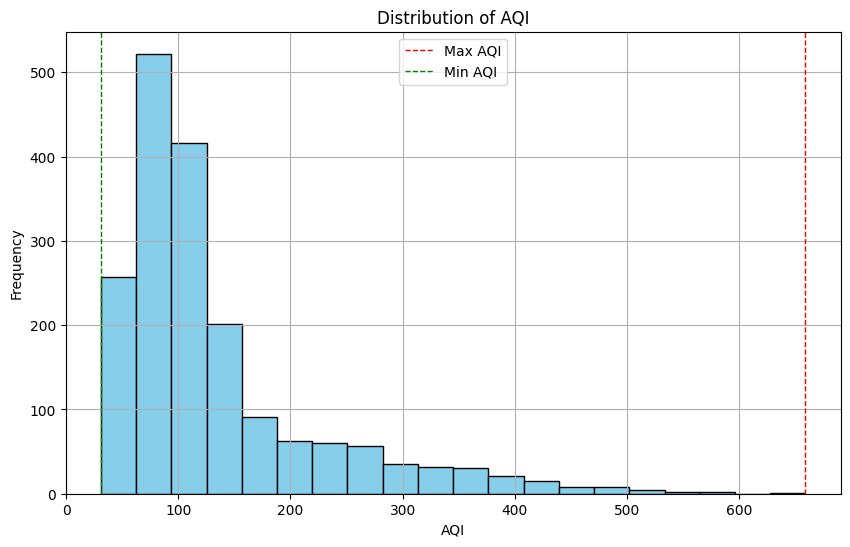

In [ ]:
# Find the maximum AQI and corresponding city
max_aqi_row = df.loc[df['AQI'].idxmax()]
max_aqi_city = max_aqi_row['City']
max_aqi_value = max_aqi_row['AQI']

# Find the minimum AQI and corresponding city
min_aqi_row = df.loc[df['AQI'].idxmin()]
min_aqi_city = min_aqi_row['City']
min_aqi_value = min_aqi_row['AQI']

# Print the results
print(f"Maximum AQI recorded: {max_aqi_value} in {max_aqi_city}")
print(f"Minimum AQI recorded: {min_aqi_value} in {min_aqi_city}")

# Visualization - Histogram of AQI
plt.figure(figsize=(10, 6))
plt.hist(df['AQI'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of AQI')
plt.axvline(max_aqi_value, color='red', linestyle='dashed', linewidth=1, label='Max AQI')
plt.axvline(min_aqi_value, color='green', linestyle='dashed', linewidth=1, label='Min AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

6. Which city has the highest AQI value on a specific date ? [by taking date randomly]

On 07-10-2019, the city with the highest AQI value is Delhi with AQI value of 133.


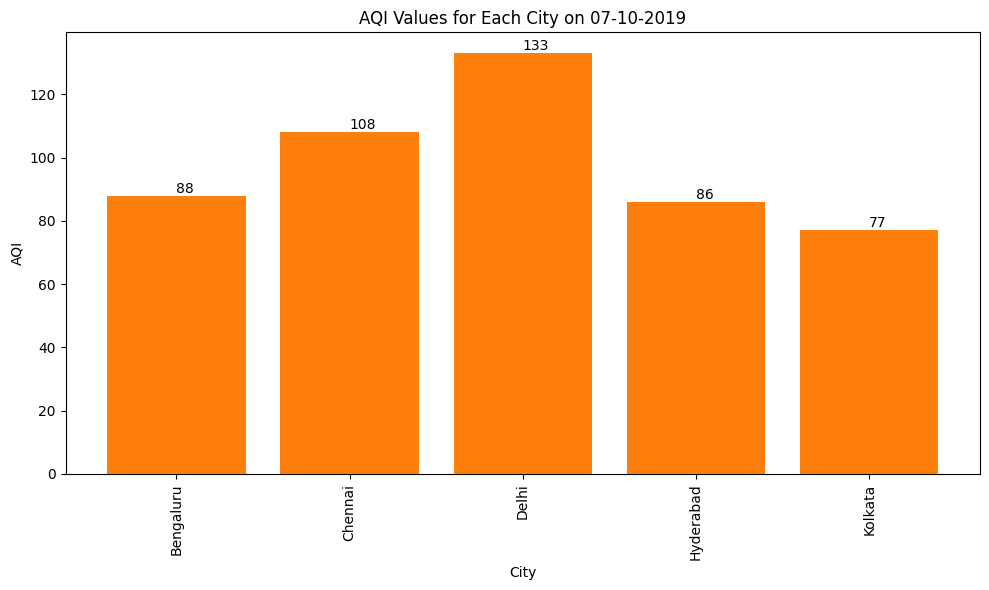

In [ ]:
specific_date_data = df[df['Date'] == '07-10-2019']

max_aqi_row = specific_date_data.loc[specific_date_data['AQI'].idxmax()]

# Extracting city with the highest AQI value
city_with_highest_aqi = max_aqi_row['City']

# Extracting highest AQI value
highest_aqi_value = max_aqi_row['AQI']

print(f"On {specific_date_data.iloc[0]['Date']}, the city with the highest AQI value is {city_with_highest_aqi} with AQI value of {highest_aqi_value}.")


#Data Visualization [bar chart]
plt.figure(figsize=(10, 6))
plt.bar(specific_date_data['City'], specific_date_data['AQI'])
bars = plt.bar(specific_date_data['City'], specific_date_data['AQI'])

# Adding numbers above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')
plt.xlabel('City')
plt.ylabel('AQI')
plt.title('AQI Values for Each City on ' + '07-10-2019')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

7.Which city has the highest variability in AQI values?

City with the highest variability in AQI: Delhi


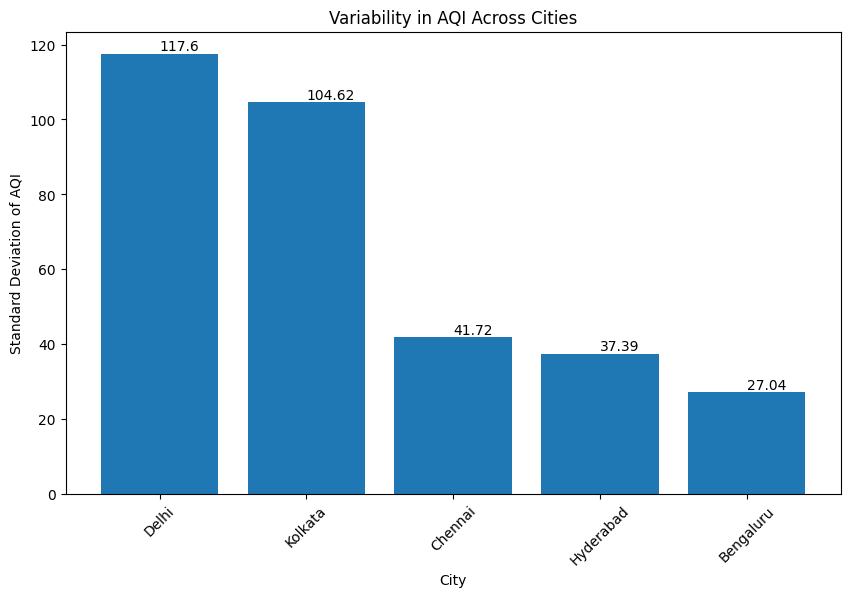

In [ ]:
# Calculate the standard deviation of AQI for each city
aqi_std_dev = df.groupby('City')['AQI'].std().sort_values(ascending=False)

# Identifying the city with the highest standard deviation of AQI
city_with_highest_variability = aqi_std_dev.idxmax()
print("City with the highest variability in AQI:", city_with_highest_variability)

# Plotting the standard deviation of AQI for each city
plt.figure(figsize=(10, 6))
bars = plt.bar(aqi_std_dev.index, aqi_std_dev.values)
plt.title('Variability in AQI Across Cities')
plt.xlabel('City')
plt.ylabel('Standard Deviation of AQI')
plt.xticks(rotation=45)

# Adding numbers above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.show()

8.What is the average AQI for each city?

Average AQI for each city:
        City         AQI
0  Bengaluru   91.602740
1    Chennai  102.994505
2      Delhi  232.104110
3  Hyderabad   93.980822
4    Kolkata  143.909589


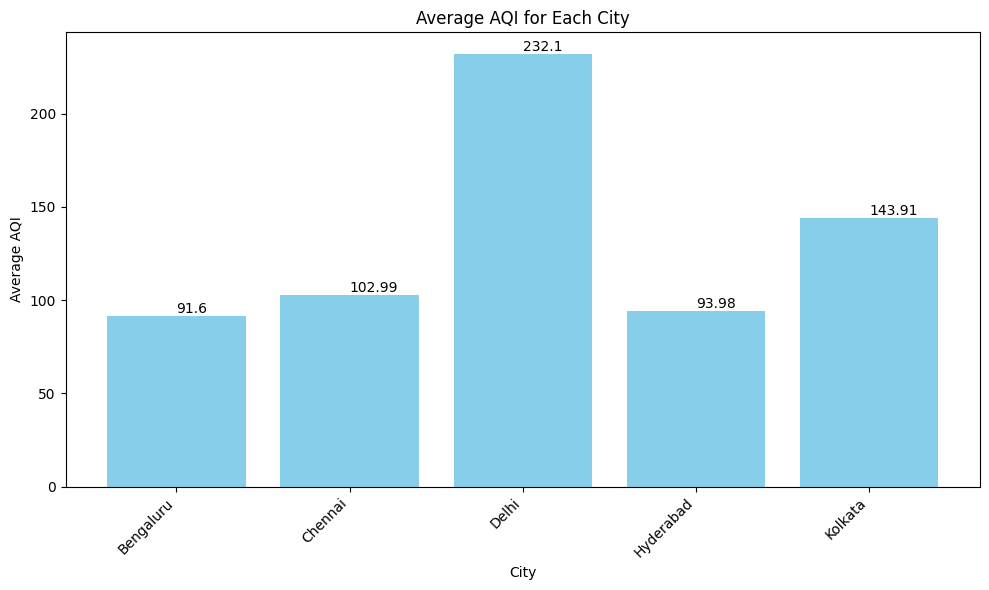

In [ ]:
# Calculate average AQI for each city
avg_aqi_per_city = df.groupby('City')['AQI'].mean().reset_index()

# Print average AQI for each city
print("Average AQI for each city:")
print(avg_aqi_per_city)

# Visualize average AQI for each city
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_aqi_per_city['City'], avg_aqi_per_city['AQI'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.title('Average AQI for Each City')
plt.xticks(rotation=45, ha='right')

# Adding numbers above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()


9. What is the trend of AQI over time for a specific city ?

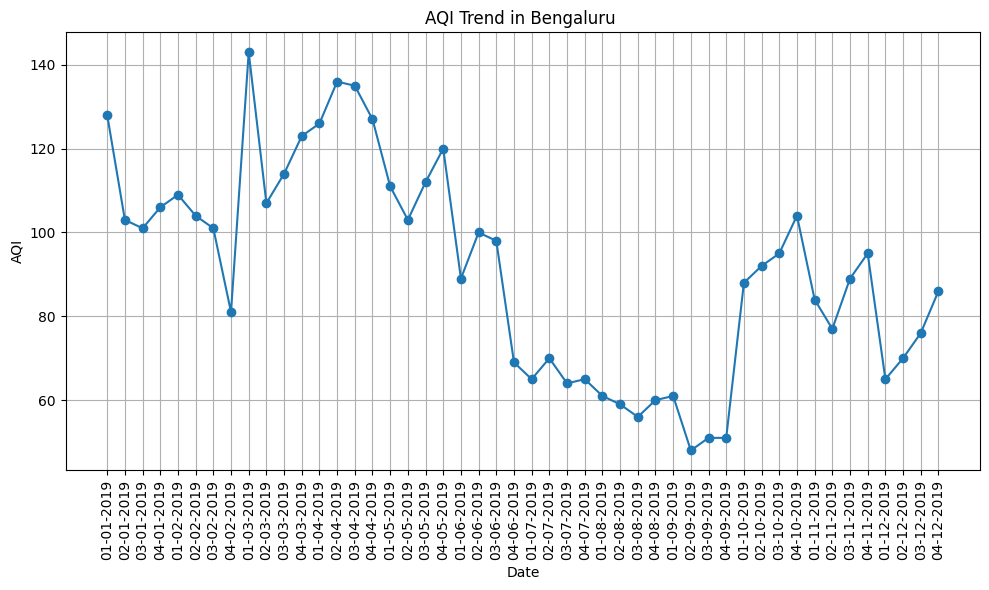

In [ ]:
# Filter data for a Bengaluru
city = 'Bengaluru'
start_date = '01-01-2019'
end_date = '04-12-2019'

filtered_data = df[(df['City'] == city) & (df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Visualize the trend of AQI over time [line chart]
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Date'], filtered_data['AQI'], marker='o', linestyle='-')
plt.title(f'AQI Trend in {city} ')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

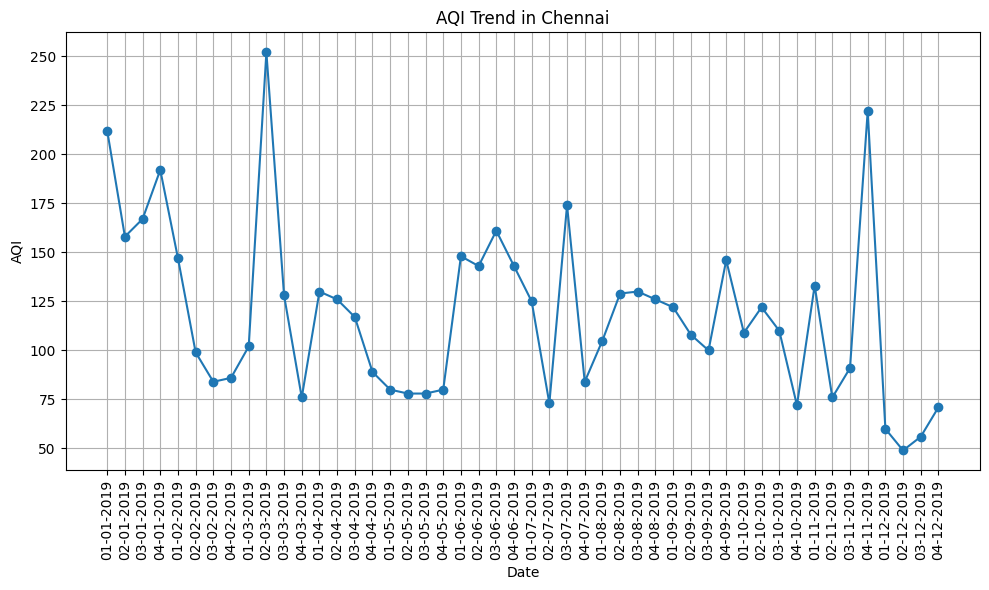

In [ ]:
# Filter data for a Chennai
city = 'Chennai'
start_date = '01-01-2019'
end_date = '04-12-2019'

filtered_data = df[(df['City'] == city) & (df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Visualize the trend of AQI over time [line chart]
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Date'], filtered_data['AQI'], marker='o', linestyle='-')
plt.title(f'AQI Trend in {city}')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

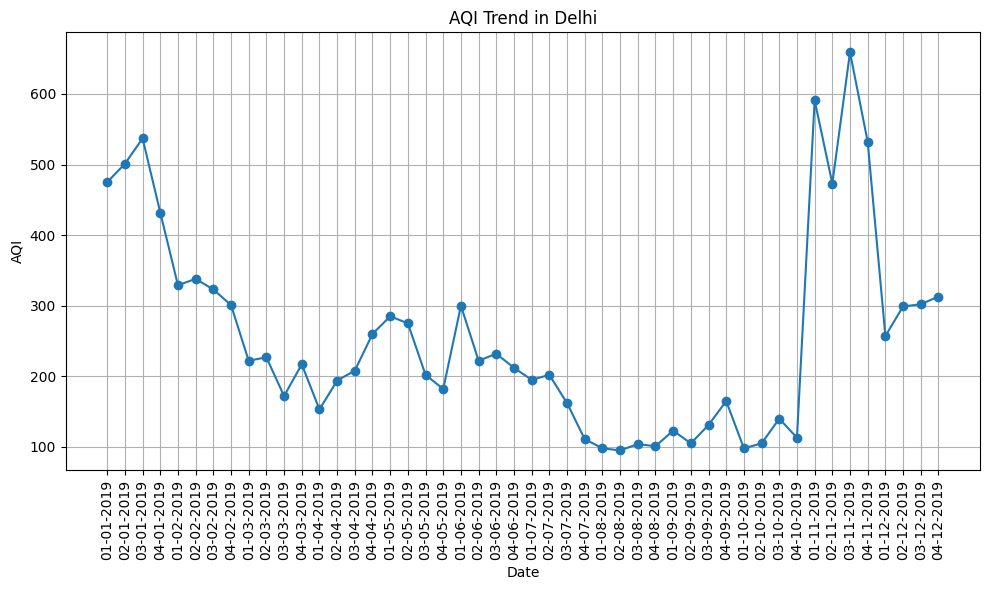

In [ ]:
# Filter data for a Delhi
city = 'Delhi'
start_date = '01-01-2019'
end_date = '04-12-2019'

filtered_data = df[(df['City'] == city) & (df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Visualize the trend of AQI over time [line chart]
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Date'], filtered_data['AQI'], marker='o', linestyle='-')
plt.title(f'AQI Trend in {city}')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

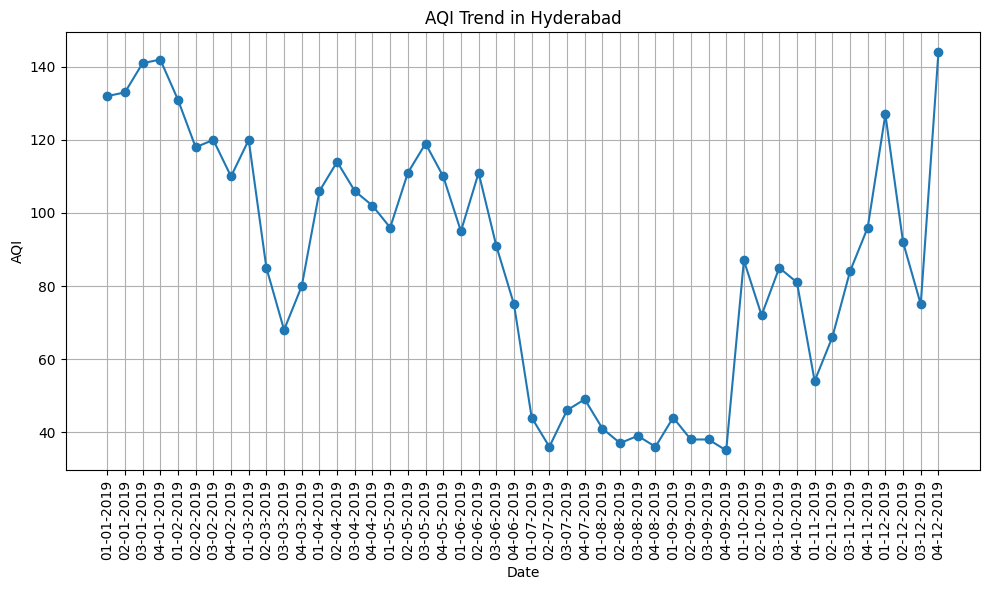

In [ ]:
# Filter data for a Hyderabad
city = 'Hyderabad'
start_date = '01-01-2019'
end_date = '04-12-2019'

filtered_data = df[(df['City'] == city) & (df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Visualize the trend of AQI over time [line chart]
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Date'], filtered_data['AQI'], marker='o', linestyle='-')
plt.title(f'AQI Trend in {city}')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

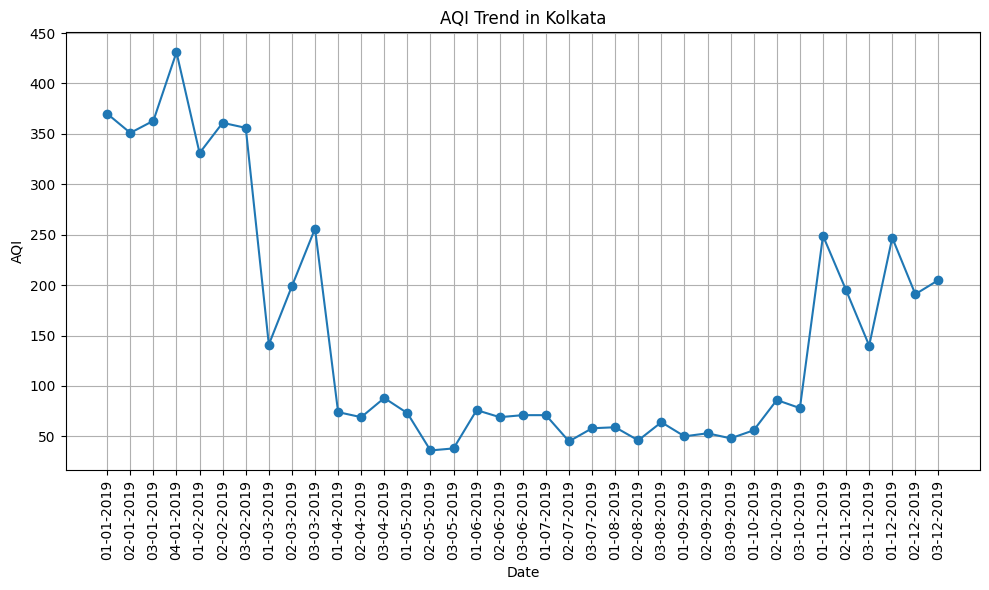

In [ ]:
# Filter data for a Kolkata
city = 'Kolkata'
start_date = '01-01-2019'
end_date = '04-01-2019'

filtered_data = df[(df['City'] == city) & (df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Visualize the trend of AQI over time [line chart]
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Date'], filtered_data['AQI'], marker='o', linestyle='-')
plt.title(f'AQI Trend in {city}')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

10.How many cities have 'Poor' air quality on a specific date?

Number of cities with 'Poor' air quality on 10-01-2019: 2


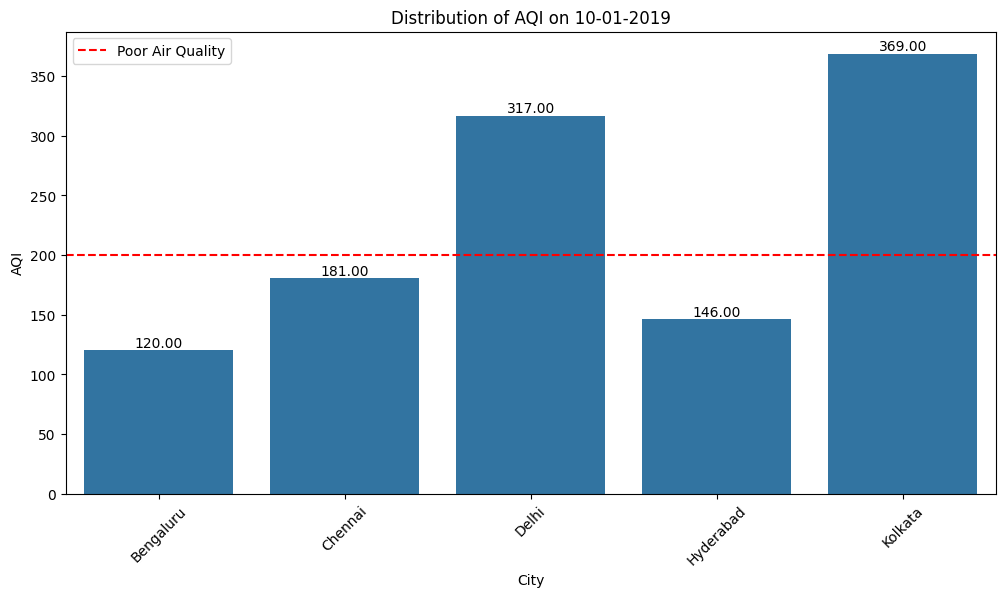

In [ ]:
# Specify the date of interest
specific_date = '10-01-2019'

# Filter the DataFrame for the specified date
filtered_df = df[df['Date'] == specific_date]
# Count the number of cities with AQI > 200 ('Poor' air quality)
poor_air_quality_cities = filtered_df[filtered_df['AQI'] > 200]['City'].nunique()

print(f"Number of cities with 'Poor' air quality on {specific_date}: {poor_air_quality_cities}")

# Plotting the distribution of AQI for each city on the specified date
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='City', y='AQI', data=filtered_df)
plt.title(f'Distribution of AQI on {specific_date}')
plt.xlabel('City')
plt.ylabel('AQI')
plt.xticks(rotation=45)

# Adding numbers above each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom')

plt.axhline(y=200, color='r', linestyle='--', label='Poor Air Quality')
plt.legend()
plt.show()


11.Which city exhibits the highest O3 levels?

The city with the highest average O3 level is Bengaluru with an average O3 level of 40.34 µg/m³.


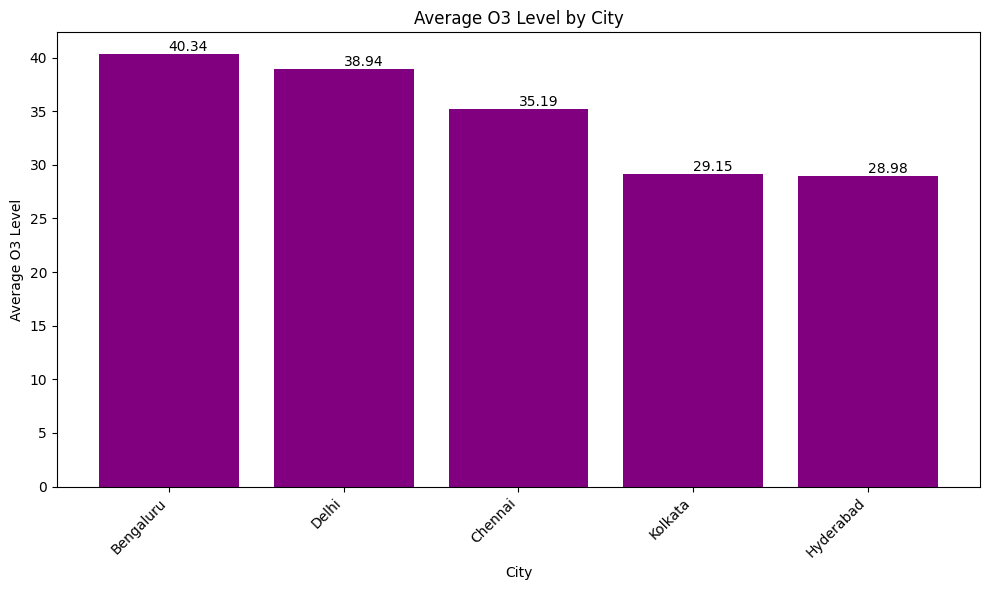

City with the highest average O3 level: Bengaluru


In [ ]:
# Group data by city and calculate the average O3 level
average_O3_by_city = df.groupby('City')['O3'].mean()

# Find the city with the highest average O3 level
city_with_highest_O3 = average_O3_by_city.idxmax()
highest_O3_level = average_O3_by_city.max()

print(f"The city with the highest average O3 level is {city_with_highest_O3} with an average O3 level of {highest_O3_level:.2f} µg/m³.")

# Visualization
plt.figure(figsize=(10, 6))
avg_O3_by_city_sorted = average_O3_by_city.sort_values(ascending=False)
bars = plt.bar(avg_O3_by_city_sorted.index, avg_O3_by_city_sorted.values, color='purple')
plt.xlabel('City')
plt.ylabel('Average O3 Level')
plt.title('Average O3 Level by City')

# Adding numbers above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

highest_O3_city = average_O3_by_city.idxmax()
print("City with the highest average O3 level:", highest_O3_city)


12.What is the correlation between PM2.5, PM10, NO, NO2, NOx, NH3 vs AQI ?

Correlation between PM2.5 and AQI: 0.9425042343067523
Correlation between PM10 and AQI: 0.9405186707937105
Correlation between NO and AQI: 0.7491279583970282
Correlation between NO2 and AQI: 0.7386379539725857
Correlation between NOx and AQI: 0.7236943230332883
Correlation between NH3 and AQI: 0.3749607628454454


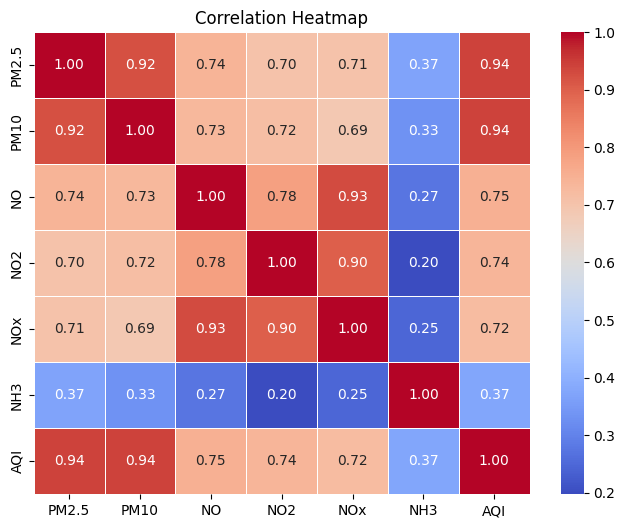

In [ ]:
# Calculate the correlation between PM2.5 and AQI
correlation = df['PM2.5'].corr(df['AQI'])
print("Correlation between PM2.5 and AQI:", correlation)
# Calculate the correlation between PM10 and AQI
correlation = df['PM10'].corr(df['AQI'])
print("Correlation between PM10 and AQI:", correlation)
# Calculate the correlation between NO and AQI
correlation = df['NO'].corr(df['AQI'])
print("Correlation between NO and AQI:", correlation)
# Calculate the correlation between NO2 and AQI
correlation = df['NO2'].corr(df['AQI'])
print("Correlation between NO2 and AQI:", correlation)
# Calculate the correlation between NOx and AQI
correlation = df['NOx'].corr(df['AQI'])
print("Correlation between NOx and AQI:", correlation)
# Calculate the correlation between NH3 and AQI
correlation = df['NH3'].corr(df['AQI'])
print("Correlation between NH3 and AQI:", correlation)

# Calculate the correlation matrix
correlation_matrix = df[['PM2.5','PM10','NO', 'NO2', 'NOx', 'NH3', 'AQI']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

13.How many days have ‘Poor' air quality across all cities ?

Number of days with 'Poor' air quality for each city:
City
Chennai    12
Delhi      99
Kolkata    63
dtype: int64


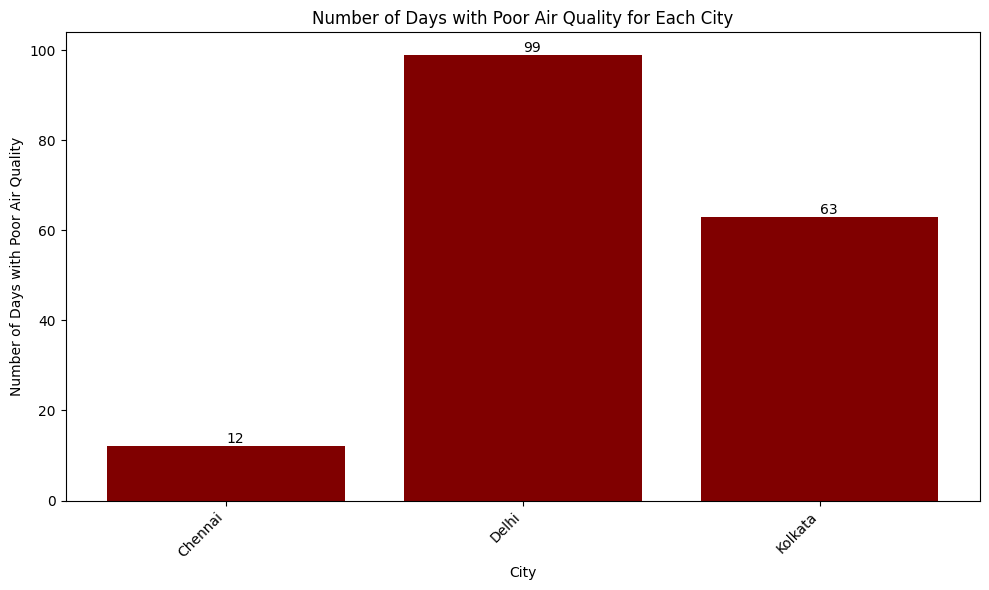

In [ ]:
poor_air_quality_df = df[df['AQI_Bucket'] == 'Poor']

# Group the filtered DataFrame by 'city' and count the number of rows for each city
poor_air_quality_count = poor_air_quality_df.groupby('City').size()

# Print the number of days with 'Poor' air quality for each city
print("Number of days with 'Poor' air quality for each city:")
print(poor_air_quality_count)

poor_air_quality_count_df = poor_air_quality_count.reset_index()
poor_air_quality_count_df.columns = ['City', 'Poor Air Quality Days']

# Plot the data
plt.figure(figsize=(10, 6))
bars = plt.bar(poor_air_quality_count_df['City'], poor_air_quality_count_df['Poor Air Quality Days'], color='maroon')
plt.xlabel('City')
plt.ylabel('Number of Days with Poor Air Quality')
plt.title('Number of Days with Poor Air Quality for Each City')
plt.xticks(rotation=45, ha='right')

# Adding numbers above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()


14.What is the correlation between CO, SO2, O3, Benzene, Toluene, Xylene vs AQI concentrations?

Correlation between CO and AQI: 0.7975050843787976
Correlation between SO2 and AQI: 0.6489589887910383
Correlation between O3 and AQI: 0.25813447063269573
Correlation between Benzene and AQI: 0.25627530163737494
Correlation between Toluene and AQI: 0.6596228397947511
Correlation between Xylene and AQI: 0.01663889012322852


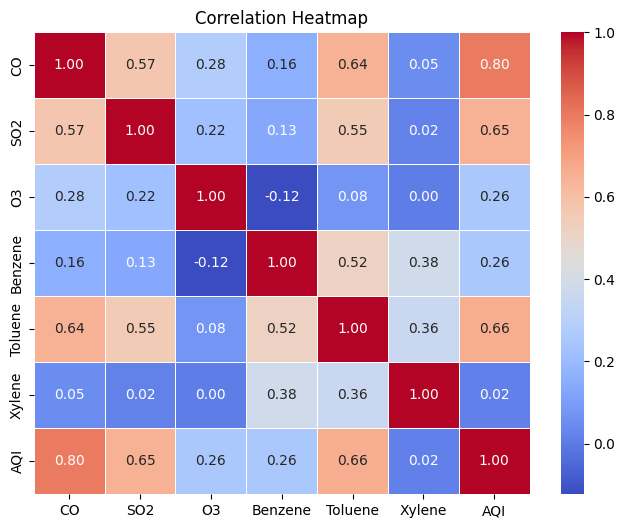

In [ ]:
# Calculate the correlation between CO and AQI
correlation = df['CO'].corr(df['AQI'])
print("Correlation between CO and AQI:", correlation)
# Calculate the correlation between SO2 and AQI
correlation = df['SO2'].corr(df['AQI'])
print("Correlation between SO2 and AQI:", correlation)
# Calculate the correlation between O3 and AQI
correlation = df['O3'].corr(df['AQI'])
print("Correlation between O3 and AQI:", correlation)
# Calculate the correlation between Benzene and AQI
correlation = df['Benzene'].corr(df['AQI'])
print("Correlation between Benzene and AQI:", correlation)
# Calculate the correlation between Toluene and AQI
correlation = df['Toluene'].corr(df['AQI'])
print("Correlation between Toluene and AQI:", correlation)
# Calculate the correlation between Xylene and AQI
correlation = df['Xylene'].corr(df['AQI'])
print("Correlation between Xylene and AQI:", correlation)


# Calculate the correlation matrix
correlation_matrix = df[['CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene','AQI']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

15.Which city has the highest level of SO2 on average?

The city with the highest average SO2 level is Delhi with an average SO2 level of 14.03 µg/m³.


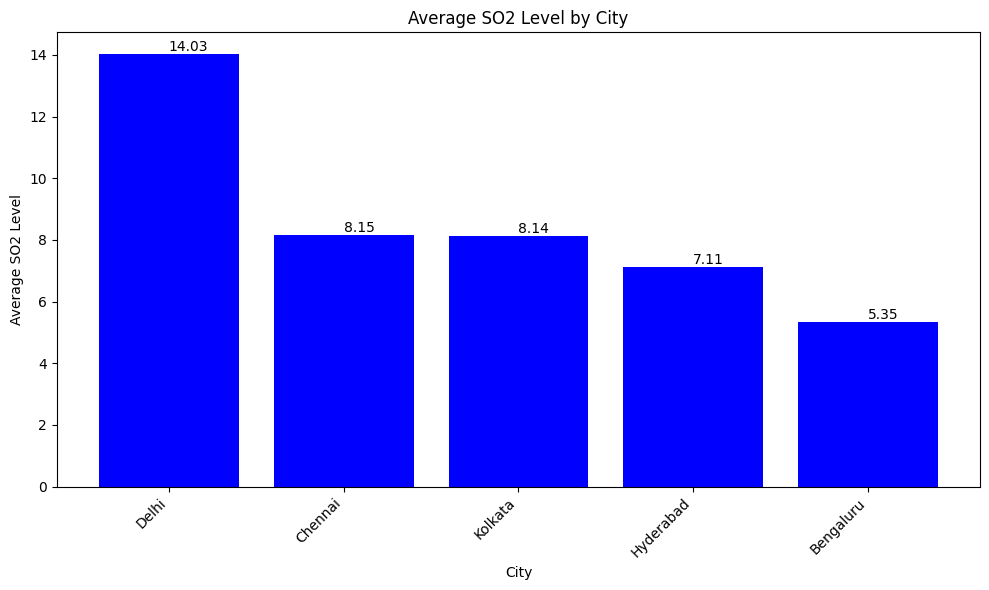

City with the highest average SO2 level: Delhi


In [ ]:
# Group data by city and calculate the average SO2 level
average_so2_by_city = df.groupby('City')['SO2'].mean()

# Find the city with the highest average SO2 level
city_with_highest_so2 = average_so2_by_city.idxmax()
highest_so2_level = average_so2_by_city.max()

print(f"The city with the highest average SO2 level is {city_with_highest_so2} with an average SO2 level of {highest_so2_level:.2f} µg/m³.")
# Group data by city and calculate the average SO2 level
avg_so2_by_city = df.groupby('City')['SO2'].mean()
avg_so2_by_city_sorted = avg_so2_by_city.sort_values(ascending=False)

# Visualization - Bar chart of Average SO2 Level by City
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_so2_by_city_sorted.index, avg_so2_by_city_sorted.values, color='blue')

# Adding numbers above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')
plt.xlabel('City')
plt.ylabel('Average SO2 Level')
plt.title('Average SO2 Level by City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

highest_so2_city = avg_so2_by_city.idxmax()
print("City with the highest average SO2 level:", highest_so2_city)

16.Which city has the highest levels of benzene, toluene, and xylene?

City with the highest levels of benzene: Kolkata
City with the highest levels of Xylene: Kolkata
City with the highest levels of Toluene: Delhi


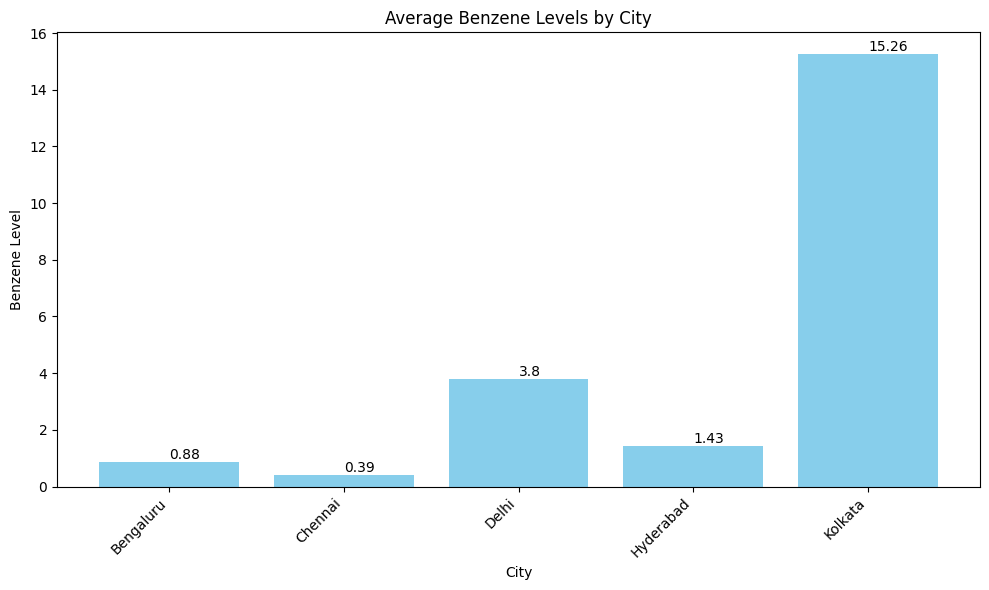

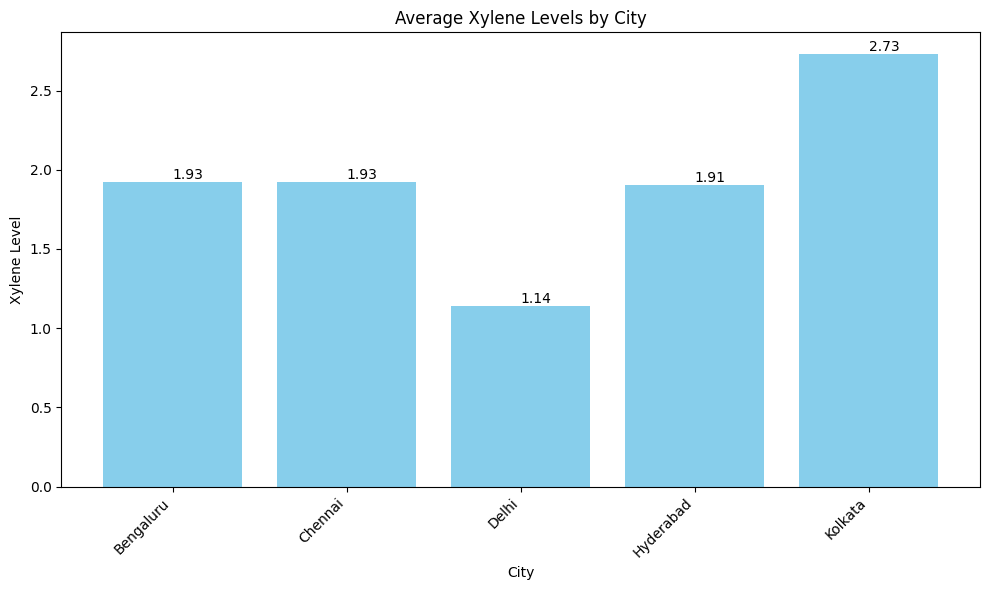

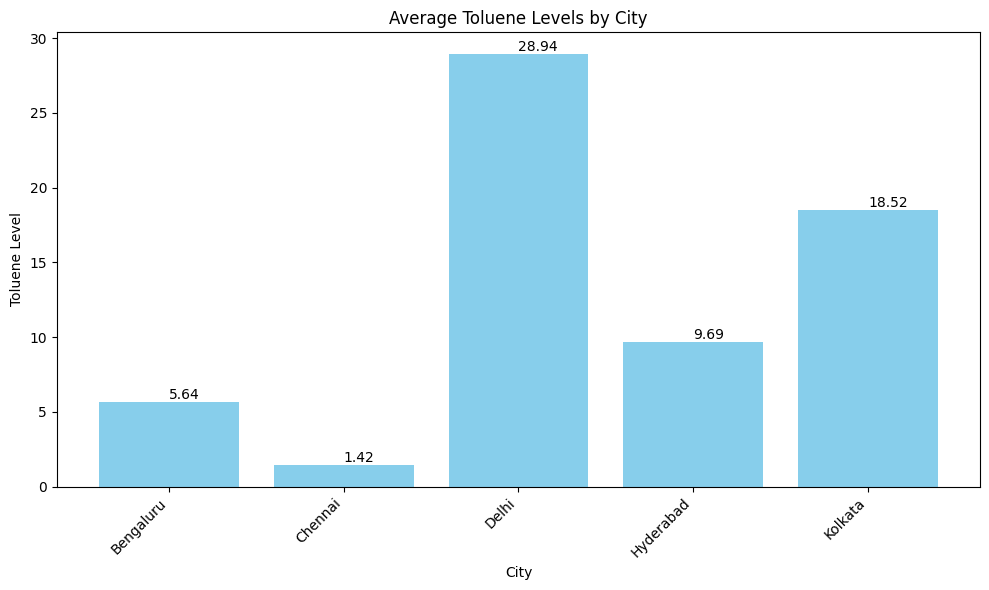

In [ ]:
# Group by city and calculate the mean benzene levels for each city
benzene_by_city = df.groupby('City')['Benzene'].mean().reset_index()
xylene_by_city = df.groupby('City')['Xylene'].mean().reset_index()
toluene_by_city = df.groupby('City')['Toluene'].mean().reset_index()

# Find the city with the highest benzene levels
highest_benzene_city = benzene_by_city.loc[benzene_by_city['Benzene'].idxmax()]
highest_xylene_city = xylene_by_city.loc[xylene_by_city['Xylene'].idxmax()]
highest_toluene_city = toluene_by_city.loc[toluene_by_city['Toluene'].idxmax()]

print("City with the highest levels of benzene:", highest_benzene_city['City'])
print("City with the highest levels of Xylene:", highest_xylene_city['City'])
print("City with the highest levels of Toluene:", highest_toluene_city['City'])

# Visualize benzene levels across different cities
plt.figure(figsize=(10, 6))
bars = plt.bar(benzene_by_city['City'], benzene_by_city['Benzene'], color='skyblue')
plt.title('Average Benzene Levels by City')
plt.xlabel('City')
plt.ylabel('Benzene Level')
plt.xticks(rotation=45, ha='right')

# Adding numbers above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()

# Visualize Xylene levels across different cities
plt.figure(figsize=(10, 6))
bars = plt.bar(xylene_by_city['City'], xylene_by_city['Xylene'], color='skyblue')
plt.title('Average Xylene Levels by City')
plt.xlabel('City')
plt.ylabel('Xylene Level')
plt.xticks(rotation=45, ha='right')

# Adding numbers above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()

# Visualize Toluene levels across different cities
plt.figure(figsize=(10, 6))
bars = plt.bar(toluene_by_city['City'], toluene_by_city['Toluene'], color='skyblue')
plt.title('Average Toluene Levels by City')
plt.xlabel('City')
plt.ylabel('Toluene Level')
plt.xticks(rotation=45, ha='right')

# Adding numbers above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()


17.Which pollutant has the highest maximum concentration across all cities?

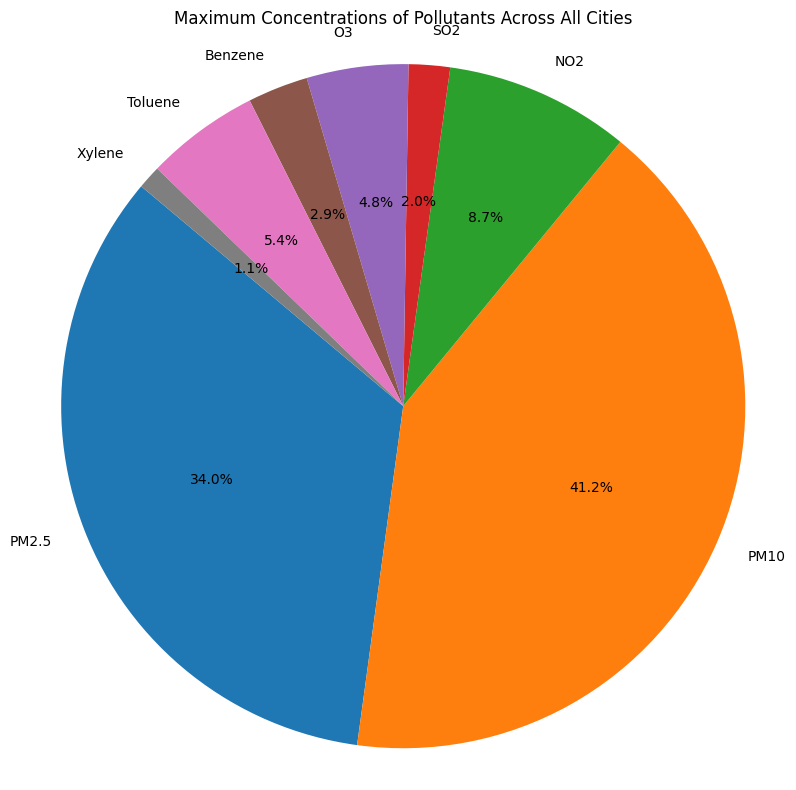

In [ ]:
# Extracting maximum concentrations
max_concentrations = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']].max()

# Plotting in pie chart form
plt.figure(figsize=(8, 8))
plt.pie(max_concentrations, labels=max_concentrations.index, autopct='%1.1f%%', startangle=140)
plt.title('Maximum Concentrations of Pollutants Across All Cities')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

18.What is the distributions of factors which causes air pollution in different cities ?

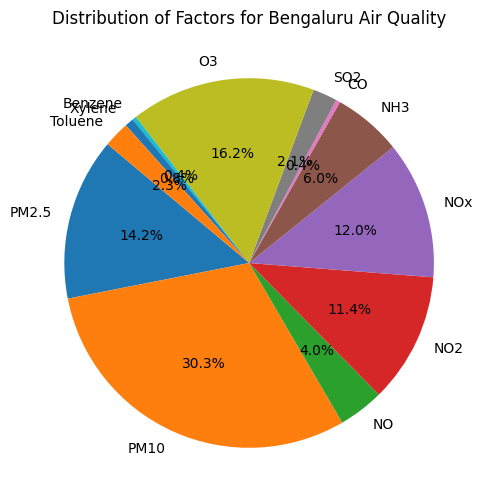

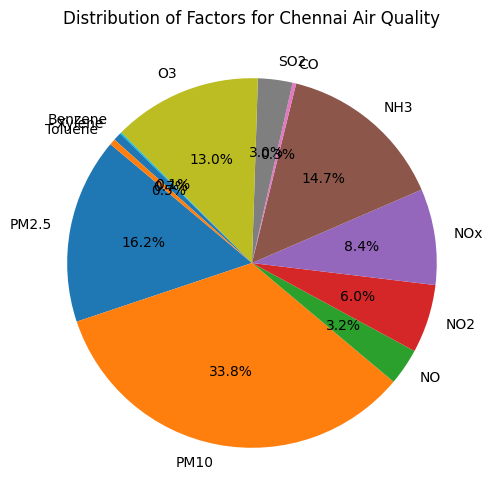

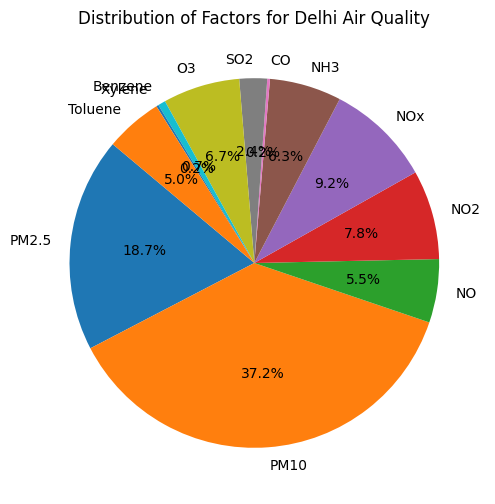

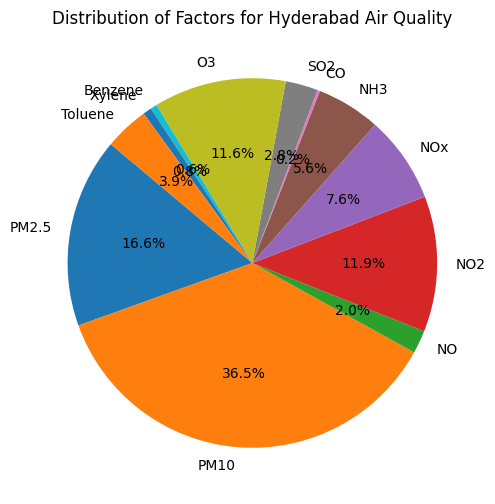

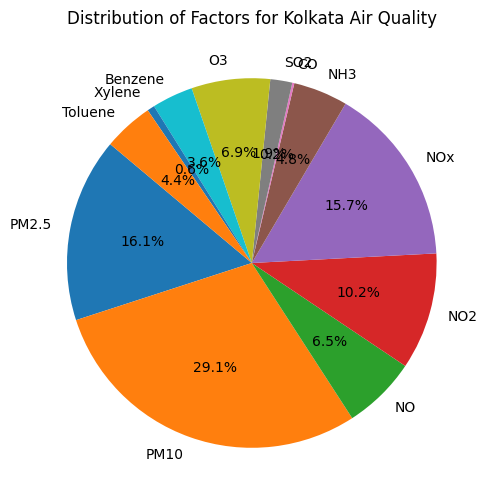

In [ ]:
#Filter data for a specific city
city_name = "Bengaluru"  # Replace "Delhi" with the name of the city you're interested in
city_data = df[df['City'] == city_name]
#Calculate factor distribution for the selected city
factor_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Xylene','Toluene']
factor_distribution = city_data[factor_columns].mean()
#Visualize with a pie chart
plt.figure(figsize=(10, 6))
factor_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title(f"Distribution of Factors for {city_name} Air Quality")
plt.ylabel("")
plt.show()

#Filter data for a specific city
city_name = "Chennai"  # Replace "Delhi" with the name of the city you're interested in
city_data = df[df['City'] == city_name]
#Calculate factor distribution for the selected city
factor_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Xylene','Toluene']
factor_distribution = city_data[factor_columns].mean()
#Visualize with a pie chart
plt.figure(figsize=(10, 6))
factor_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title(f"Distribution of Factors for {city_name} Air Quality")
plt.ylabel("")
plt.show()

#Filter data for a specific city
city_name = "Delhi"  # Replace "Delhi" with the name of the city you're interested in
city_data = df[df['City'] == city_name]
#Calculate factor distribution for the selected city
factor_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Xylene','Toluene']
factor_distribution = city_data[factor_columns].mean()
#Visualize with a pie chart
plt.figure(figsize=(10, 6))
factor_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title(f"Distribution of Factors for {city_name} Air Quality")
plt.ylabel("")
plt.show()

#Filter data for a specific city
city_name = "Hyderabad"  # Replace "Delhi" with the name of the city you're interested in
city_data = df[df['City'] == city_name]
#Calculate factor distribution for the selected city
factor_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Xylene','Toluene']
factor_distribution = city_data[factor_columns].mean()
#Visualize with a pie chart
plt.figure(figsize=(10, 6))
factor_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title(f"Distribution of Factors for {city_name} Air Quality")
plt.ylabel("")
plt.show()

#Filter data for a specific city
city_name = "Kolkata"  # Replace "Delhi" with the name of the city you're interested in
city_data = df[df['City'] == city_name]
#Calculate factor distribution for the selected city
factor_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Xylene','Toluene']
factor_distribution = city_data[factor_columns].mean()
#Visualize with a pie chart
plt.figure(figsize=(10, 6))
factor_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title(f"Distribution of Factors for {city_name} Air Quality")
plt.ylabel("")
plt.show()

19.What is the distribution of AQI_Bucket for any specific city?

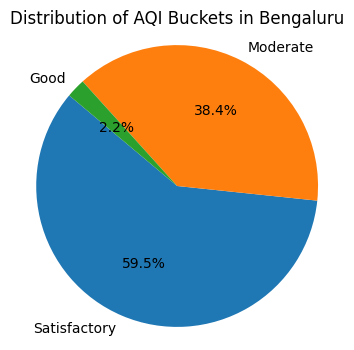

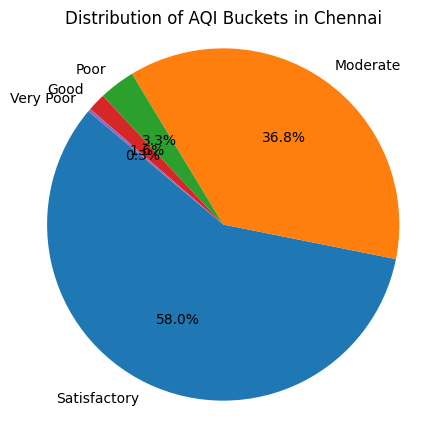

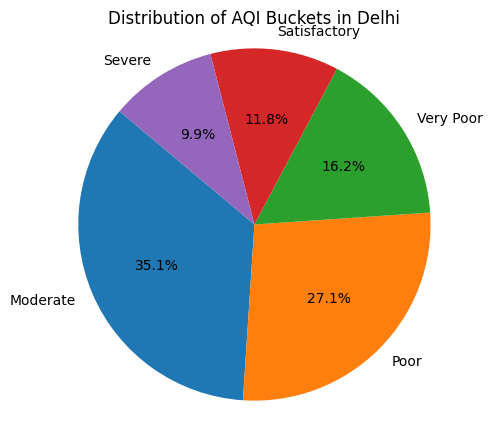

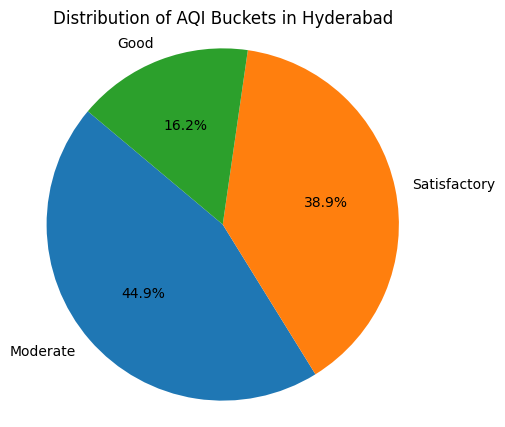

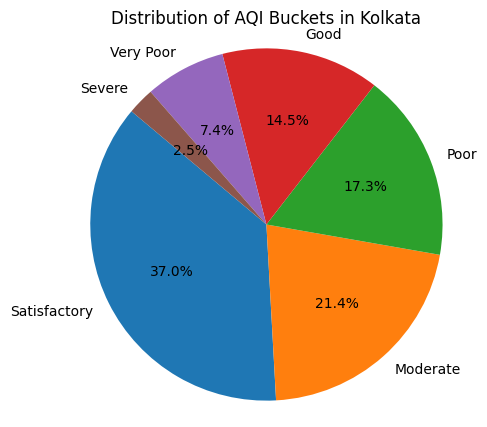

,City,AQI_Bucket
0,Bengaluru,Satisfactory
1,Chennai,Satisfactory
2,Delhi,Moderate
3,Hyderabad,Moderate
4,Kolkata,Satisfactory


In [ ]:
city_data = df[df['City'] == 'Bengaluru']
# Group data by AQI bucket and count occurrences
aqi_bucket_counts = city_data['AQI_Bucket'].value_counts()
# Plotting pie chart
plt.figure(figsize=(4,4))
plt.pie(aqi_bucket_counts, labels=aqi_bucket_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of AQI Buckets in Bengaluru')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

city_data = df[df['City'] == 'Chennai']
# Group data by AQI bucket and count occurrences
aqi_bucket_counts = city_data['AQI_Bucket'].value_counts()
# Plotting pie chart
plt.figure(figsize=(5,5))
plt.pie(aqi_bucket_counts, labels=aqi_bucket_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of AQI Buckets in Chennai')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

city_data = df[df['City'] == 'Delhi']
# Group data by AQI bucket and count occurrences
aqi_bucket_counts = city_data['AQI_Bucket'].value_counts()
# Plotting pie chart
plt.figure(figsize=(5,5))
plt.pie(aqi_bucket_counts, labels=aqi_bucket_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of AQI Buckets in Delhi')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

city_data = df[df['City'] == 'Hyderabad']
# Group data by AQI bucket and count occurrences
aqi_bucket_counts = city_data['AQI_Bucket'].value_counts()
# Plotting pie chart
plt.figure(figsize=(5,5))
plt.pie(aqi_bucket_counts, labels=aqi_bucket_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of AQI Buckets in Hyderabad')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

city_data = df[df['City'] == 'Kolkata']
# Group data by AQI bucket and count occurrences
aqi_bucket_counts = city_data['AQI_Bucket'].value_counts()
# Plotting pie chart
plt.figure(figsize=(5,5))
plt.pie(aqi_bucket_counts, labels=aqi_bucket_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of AQI Buckets in Kolkata')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

most_common_aqi_bucket = df.groupby('City')['AQI_Bucket'].agg(lambda x: x.value_counts().index[0]).reset_index()
most_common_aqi_bucket